<a href="https://colab.research.google.com/github/danny1707/COVID_PROJECT/blob/main/Covid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=d881b846357654061303b9ae6854bd62b8f2adade13297f97fff866d4c42ebb5
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
#from skfuzzy import control as ctrl

In [ ]:
#input data 

df = pd.read_csv('person1_range_data.csv', sep=',')
df

,num,disease,range
0,1,temperature-fever,10
1,2,Difficulty breathing,10
2,3,Inability to wake up or stay awake,10
3,4,Bluish discoloration of the lips or face,10
4,5,Inability to speak or move,10
5,6,Loss of smell,10
6,7,Loss of taste,10
7,8,Cough,10
8,9,Fatigue,10
9,10,Headache,10


In [ ]:
#FUNCTIONS

#Read data
def data_read(file):
  df = pd.read_csv(file, sep=',')
  #df = pd.read_csv(file, header=None)
  df = pd.read_csv(file, header=None, skiprows=1)
  return df

def convert_array(file):
  data = np.array(data_read(file))
  data = np.delete(data, (0,1), axis = 1)
  return data

# convertin data range with the 
def data_range(data):
  data_convert = []
  for i in range(0,5):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(5,7):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(7,13):
    data_convert = np.append(data_convert, data[i])
  return data_convert

def sum_data(array):
  return np.sum(array)



file = 'person1_range_data.csv'
result_range = convert_array(file)
print(result_range)
result_range = data_range(result_range)
print(result_range)
sum_data_range = sum_data(result_range)
print(sum_data_range)


[[10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]]
[50 50 50 50 50 30 30 10 10 10 10 10 10]
370


In [ ]:

def binary_risk(array):
  if array == 'yes' or array == 'YES':
    return 10
  else:
    return 0
def map_risk(data):
  return list(map(binary_risk, data))

def binary_data_range(data):
  data_convert = []
  for i in range(0,1):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(1,2):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(2,5):
    data_convert = np.append(data_convert, data[i])
  return data_convert


file = 'person1_range_binary_data.csv' 
result_binary_range = convert_array(file)
print(result_binary_range)
result_binary_range = map_risk(result_binary_range)
print(result_binary_range)


result_binary_range = binary_data_range(result_binary_range)
print(result_binary_range)
sum_binary_data_range = sum_data(result_binary_range)
print(sum_binary_data_range)


[['yes']
 ['yes']
 ['yes']
 ['yes']
 ['yes']]
[10, 10, 10, 10, 10]
[50. 30. 10. 10. 10.]
110.0


In [ ]:
#risk data

# convertin data range with the 
def data_risk(data):
  data_convert = []
  for i in range(0,2):
    data_convert = np.append(data_convert, data[i] * 5)
  for i in range(2,3):
    data_convert = np.append(data_convert, data[i] * 3)
  for i in range(3,4):
    data_convert = np.append(data_convert, data[i])
  return data_convert




file = 'person1_binary_data.csv'
data = convert_array(file)
result = map_risk(data)
#result = sum_data(result)
result = data_risk(result)
result_binary = sum_data(result)
print(result_binary)

#total = result_binary + result_range


140.0


In [ ]:
# Generate universe variables
#   * risk to have symptoms [0, 10]
#   * likelihood of needing the test [0, 100] in units of porcentage points
x_syntoms       = np.arange(0, 11, 1)
x_risk_exposure = np.arange(0, 11, 1)
x_test          = np.arange(0, 100, 1)


#generatin fuzzy membership functions

#we need two membresy functios
# *syntoms
# *risk of exposure

data 

array([50, 50, 50, 50, 50, 30, 30, 10, 10, 10, 10, 10, 10], dtype=object)

#IGNORAR, ES EL EJEMPLO **XD**

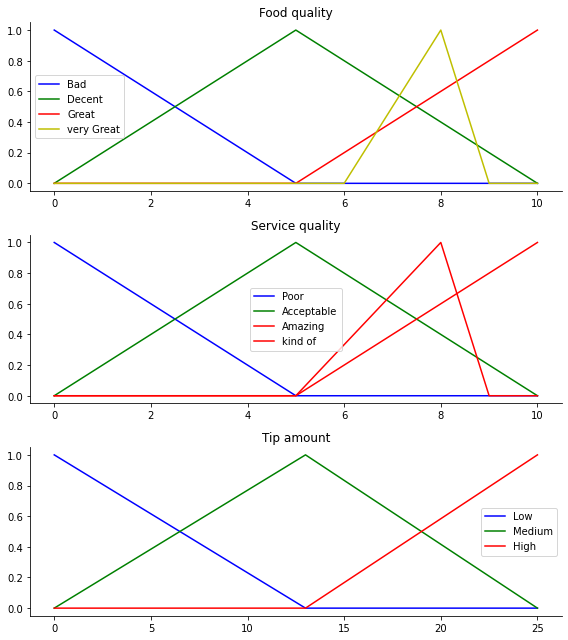

In [ ]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
#qual_lo = fuzz.trapmf(x_qual, [0, 0, 4, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])


serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])


tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')

ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!


quality = 6.5
service = 9.8

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, quality)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, quality)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, quality)


serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, service)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, service)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, service)


# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
#active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_extrahi = np.fmin(active_rule3, tip_extrahi)
#tip0 = np.zeros_like(x_tip)


# rule 4
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)


# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_extrahi, facecolor='y', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print(ax)

NameError: ignored

19.86871794871795


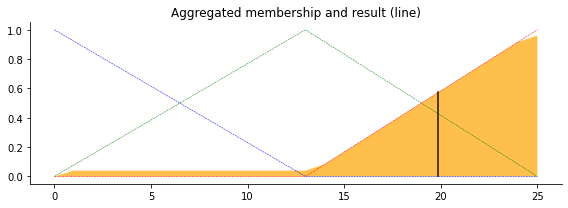

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

print(tip)